# Chapter 2c, continued: Application (R)

This notebook contains an application of non-linear regression to some geodata. We move to R for this application as R functions are more straightforward than in Python to deal with an empirical formula with both fixed and variable parameters.


## 6. The time-to-failure earthquake prediction method

We will now consider two techniques, grid search and the Gauss-Newton algorithm (related to gradient descent), to find the parameters of a non-linear regression model to predict the occurrence time and magnitude of an upcoming earthquake. We will use Root mean squared error (RMSE) as performance metric. To do so, we will use the time-to-failure earthquake prediction method and reproduce a result from Brehm & Braile (1998) (see Figure).

<img src="figs_notebook/fig_Brehm&Braile1998_Fig4a.png" width = 400>

The simplest method ever devised to predict both the time of occurrence $t_f$ and magnitude $M$ of a large earthquake is the time-to-failure method described by Bufe & Varnes (1993), which led to the development of the subfield of precursory accelerating seismicity research (see review by Mignan et al., 2011). Originally justified on the basis of damage mechanics, the time-to-failure equation is a power-law of the form:

$$\epsilon (t) = \sum_{i=1}^{N(t)} E_i (t)^{1/2} = K - \frac{k}{m}(t_f-t)^m$$

which describes the temporal evolution of seismic precursors, where $\epsilon$ is the cumulative Benioff strain defined from the square root of the seismic energy $E$, $K$ is the total cumulative Benioff strain, $t_f$ is the time of the mainshock and $k$ and $m$ are constants. The method was later improved by Brehm & Braile (1998) by reducing the number of free parameters from four ($K$, $t_f$ , $k$ and $m$) to three ($K_m$, $t_f$ and $m$):

$$ \epsilon (t) = \sum_{i=1}^{N(t)} E_i (t)^{1/2} = (K_p + K_m) - \frac{k}{m} (t_f-t)^m $$

where $K_p$, the total cumulative Benioff strain of precursors, is known, and $K_m$ is the Benioff strain released by the future mainshock which relates to its magnitude $M$ via the seismic energy $E = M_0/20000$, itself function of the seismic moment $M_0 = 10^{0.14M^2 + 0.36M + 10.76}$ (in N.m for the case of seismic-wave energy as a function of body wave magnitude). The authors defined the ratio $k/m$ as the empirical relationship $\log_{10}(k/m) = 0.443 \log_{10} M_0 − 1.2429$ to avoid calculating $k$.

We will reproduce the analysis done by Brehm & Braile (1998) for the 1895 M6.2 New Madrid earthquake based on the earthquake catalogue of Nuttli & Brill (1981) (`Nuttli_catalog.csv` preprocessed to obtain a similar time series as above).

In [89]:
seism <- read.csv('data/Nuttli_catalog.csv', header = T)
mainshock <- tail(seism, 1)
foreshocks <- seism[-nrow(seism), ]

foreshocks$cumBenioff <- cumsum(sqrt(foreshocks$E))
mainshock$cumBenioff <- max(foreshocks$cumBenioff) + sqrt(mainshock$E)
foreshocks

,t,m,E,lon,lat,cumBenioff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1820.941,4.2,27578459563,89.5,37.3,166067.6
2,1855.425,3.8,7056185742,89.2,37.0,250068.7
3,1872.189,3.6,3709966639,89.2,37.0,310978.2
4,1874.608,3.6,3709966639,89.2,37.0,371887.7
5,1877.624,4.3,39406694255,89.7,36.8,570398.9
6,1877.969,3.6,3709966639,89.2,37.0,631308.4
7,1878.108,3.6,3709966639,89.2,37.0,692217.9
8,1878.283,4.2,27578459563,89.1,36.8,858285.6
9,1878.969,4.9,384034000000,89.3,36.7,1477990.3


**EXERCISE 4:** Plot the precursory time series and differentiate preshocks and mainshock using different colours and/or symbols. You should observe something similar to the figure from Brehm & Braile (1998) shown above. Use the same axis ranges using `xlim = c(xmin, xmax)` and `ylim = c(ymin, ymax)`.

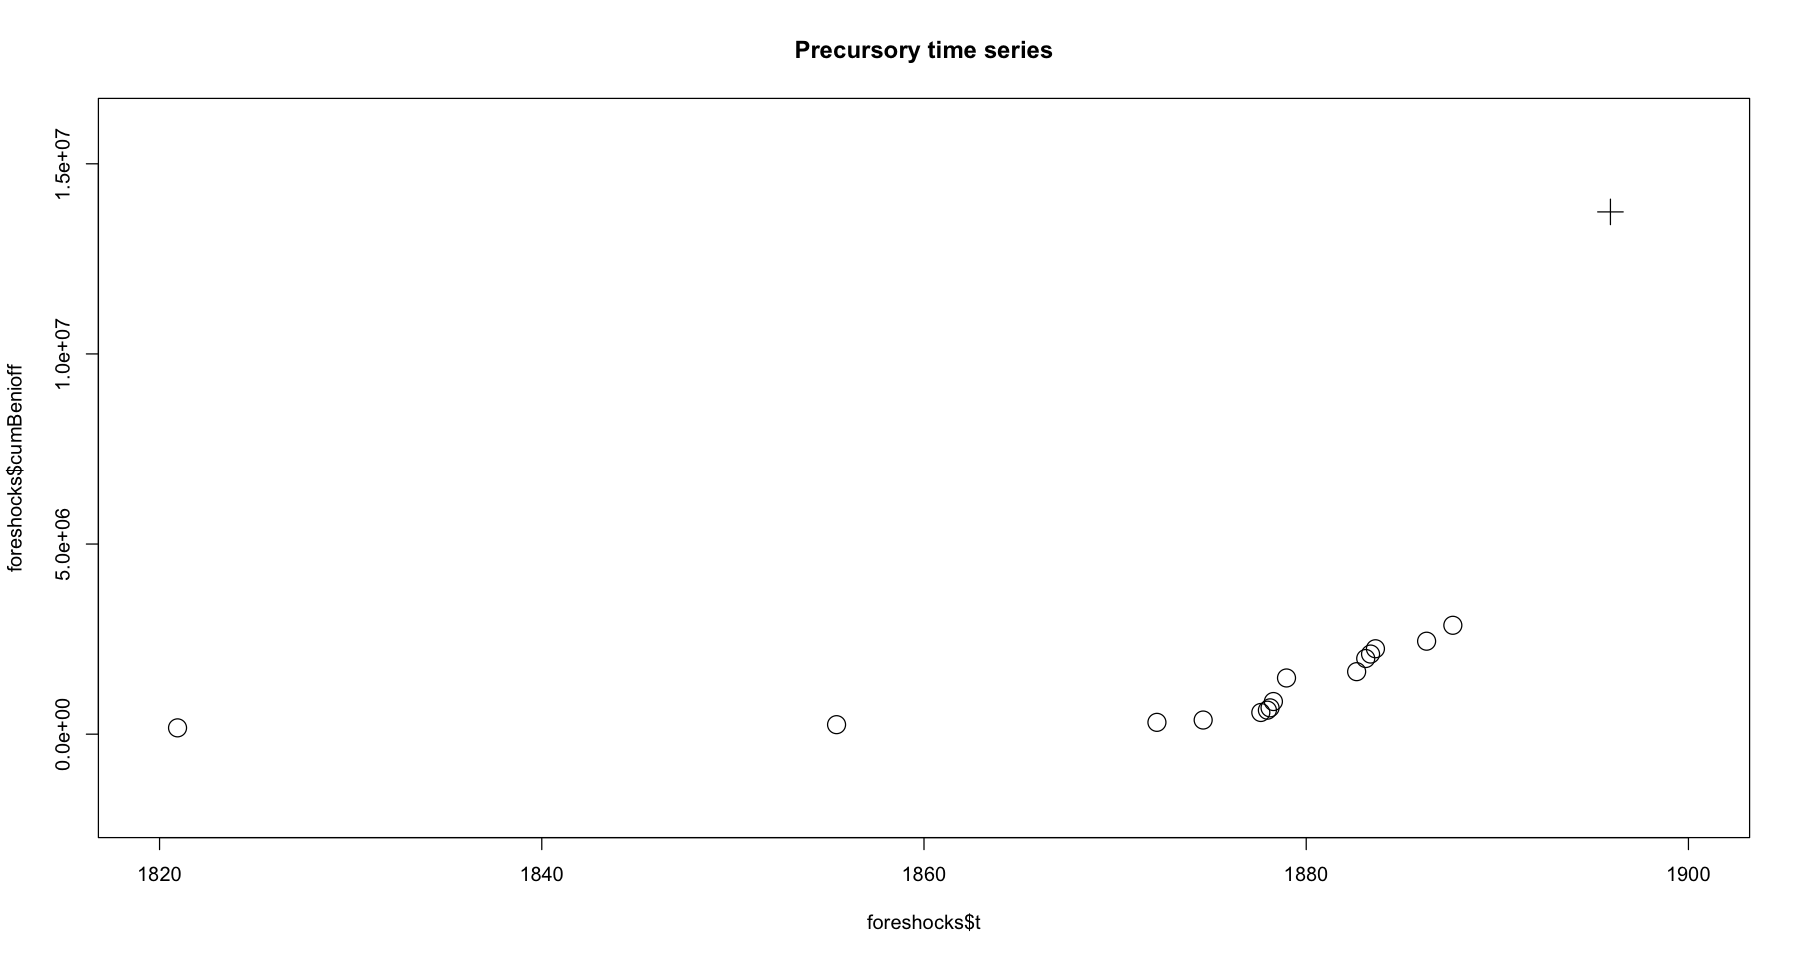

In [85]:
#YOUR CODE HERE


#SOLUTION
plot(foreshocks$t, foreshocks$cumBenioff, cex = 2, 
     xlim = c(1820, 1900), ylim = c(-2e6, 16e6), 
     main = 'Precursory time series')
points(mainshock$t, mainshock$cumBenioff, pch = 3, cex = 2)

We will now fit the Brehm & Braile (1998) equation to the preshock data. We need to estimate the 3 parameters $K_m$, $t_f$ and $m$. We are interested in $K_m$, proxy to the mainshock magnitude, and $t_f$, the mainshock occurrence time. We will therefore do a RMSE grid search for those two parameters, and for each ($K_m$, $t_f$) couple, directly estimate the power exponent $m$ using the `nls()` function default algorithm (Gauss-Newton algorithm - to be discussed in a future lecture).

**EXERCISE 5:** Estimate the RMSE in a grid search for different $t_f$ and $M$ values (ranges given below). The parameter $m$ will be estimated with the function `nls()` keeping all other parameters constant. In `nls(formula, data, ...)`, the formula takes the form `y ~ a*x+b` for a linear regression for instance. _Hint:_ The residual of the model is given in `resid(fit)`.

In [86]:
tf_i <- seq(1888, 1900, .05)
M_j <- seq(5, 6.5, .05)
n_tf <- length(tf_i)
n_M <- length(M_j)

#YOUR CODE HERE
#Kp <- ?

#RMSE <- array(dim = c(?, ?))
#m <- array(dim = c(?, ?))
#km_ratio <- array(dim = c(?, ?))
#for(i in 1:n_tf){
#    if(i%%50 == 0) print(paste(i, '/', n_tf))
    
#    for(j in 1:n_M){
        # define parameters
#        M0 <- ?
#        Km <- ?
#        km_ratio[i,j] <- ?
        
        # nonlinear least-square with Gauss-Newton algorithm to estimate m while keeping others constant
#        fit <- nls(FORMULA, 
#                   data = data.frame(t = ?, cumB = ?), 
#                   start = list(m = .5))
        
#        m[i,j] <- coef(fit)["m"]
#        RMSE[i,j] <- ?
#    }
#}


#SOLUTION
Kp <- max(foreshocks$cumBenioff)

RMSE <- array(dim = c(n_tf, n_M))
m <- array(dim = c(n_tf, n_M))
km_ratio <- array(dim = c(n_tf, n_M))
for(i in 1:n_tf){
    if(i%%50 == 0) print(paste(i, '/', n_tf))
    
    for(j in 1:n_M){
        # define parameters
        M0 <- 10^(.14 * M_j[j]^2 + .36 * M_j[j] + 10.76)
        Km <- sqrt(M0 / 2e4)
        km_ratio[i,j] <- 10^(.443 *log10(M0) - 1.2429)
        
        # nonlinear least-square with Gauss-Newton algorithm to estimate m while keeping others constant
        fit <- nls(cumB ~ Kp + Km - km_ratio[i,j] * (tf_i[i] - t) ^ m, 
                   data = data.frame(t = foreshocks$t, cumB = foreshocks$cumBenioff), 
                   start = list(m = .5))
        
        m[i,j] <- coef(fit)["m"]
        RMSE[i,j] <- sqrt(sum(resid(fit)^2) / nrow(foreshocks))
    }
}

[1] "50 / 241"
[1] "100 / 241"
[1] "150 / 241"
[1] "200 / 241"


Let us now plot the results of the RMSE grid search. If there is no error in the previous cell, you should obtain a surface resembling roughly to the one of Brehm & Braile (1998):

<img src="figs_notebook/fig_Brehm&Braile1998_Fig7a.png" width = 400>

**EXERCISE 6:** First, find the mainshock time of occurrence and magnitude predicted by the model. What is the matching power exponent of the power time-ot-failure equation? To find the indices of an array based on a condition, use `which(CONDITION, arr.ind = T)`

In [87]:
#YOUR CODE HERE
#...
#tf_pred <- ?
#M_pred <- ?

#print(paste('Predicted mainshock (tf, M): (', ?, ',', ?, ')'))
#print(paste('Observed mainshock (tf, M): (', ?, ',', ?, ')'))

#print(paste('Power exponent:', ?))


#SOLUTION
indbest <- which(RMSE == min(RMSE), arr.ind = T)
tf_pred <- tf_i[indbest[1]]
M_pred <- M_j[indbest[2]]

print(paste('Predicted mainshock (tf, M): (', tf_pred, ',', M_pred, ')'))
print(paste('Observed mainshock (tf, M): (', mainshock$t, ',', mainshock$m, ')'))

print(paste('Power exponent:', m[indbest]))

[1] "Predicted mainshock (tf, M): ( 1891.25 , 5.65 )"
[1] "Observed mainshock (tf, M): ( 1895.918207 , 6.2 )"
[1] "Power exponent: 0.231010578516305"


**EXERCISE 7:** Plot the RMSE grid search result alongside the time series already shown previously but now with the model fit on top. On the RMSE grid search plot, add the location of the optimal parameter set. Use some of the R functions learned in the previous R notebook. As the RMSE includes some very high values, the color scheme may not highlight much variations. You may consider plotting the log10 of the RMSE instead. You may also add contour lines using `contour(x, y, f(x,y), levels = seq(fmin, fmax, length.out = NUMBER_CONTOURS), add = T)` (optional). For the fitted curve on the second plot, use the function `lines()` (same arguments as in `points()`). 

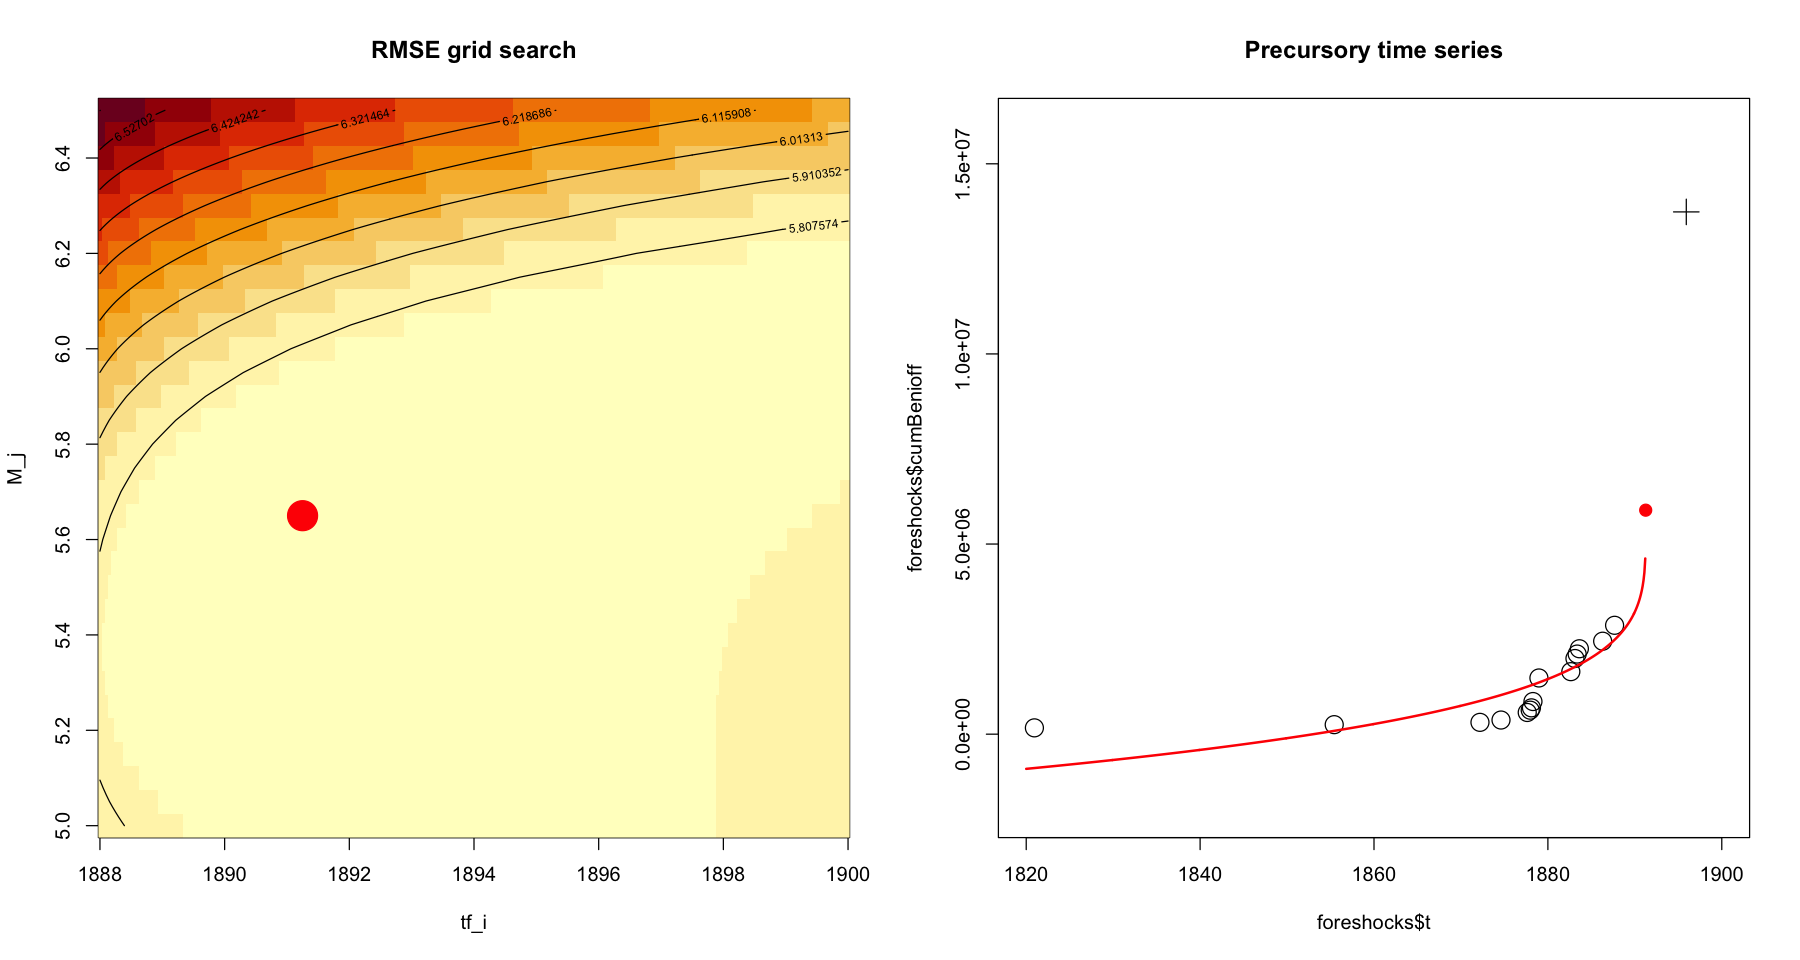

In [92]:
options(repr.plot.width = 15, repr.plot.height = 8)
par(mfrow = c(1, 2))

#YOUR CODE HERE


#SOLUTION
image(tf_i, M_j, log10(RMSE), main = 'RMSE grid search')
contour(tf_i, M_j, log10(RMSE), levels = seq(min(log10(RMSE)), max(log10(RMSE)), length.out = 10), add = T)
points(tf_pred, M_pred, col = 'red', cex = 5, pch = 20)

ti <- seq(1820, tf_pred, .1)
E_pred <- (10^(.14 * M_pred^2 + .36 * M_pred + 10.76)) / 2e4
cumBi <- Kp + sqrt(E_pred) - km_ratio[indbest] * (tf_pred - ti)^m[indbest]

plot(foreshocks$t, foreshocks$cumBenioff, cex = 2, 
     xlim = c(1820, 1900), ylim = c(-2e6, 16e6), 
     main = 'Precursory time series')
points(mainshock$t, mainshock$cumBenioff, pch = 3, cex = 2)
lines(ti, cumBi, col = 'red', lwd = 2)
points(tf_pred, Kp + sqrt(E_pred), col = 'red', cex = 2, pch = 20)

**EXERCISE 8:** Answer the following questions in words:
1. In view of the results, is the time-to-failure earthquake prediction method promising?
2. In view of what we learned in this lecture, is the published method (which we reproduced here) statistically correct? Detail your answer. _Hint: recall the assumptions behind the method of least squares_

_YOUR ANSWER HERE_

1. No it is not, because the prediction is far from the observation. This is problematic in view of the important problem that is earthquake prediction. We don't want to evacuate based on highly uncertain result. Moreover, this result is likely unstable. We would need to test it systematically.
2. It is not correct because y is cumulative data, meaning data correlation, which is not one of the underlying assumptions of least squares.

## 7. References

* Brehm & Braile (1998), Intermediate-Term Earthquake Prediction Using Precursory Events in the New Madrid Seismic Zone, Bull. Seismol. Soc. Am., 88 (2), 564-580
* Bufe & Varnes (1993), Predictive Modeling of the Seismic Cycle of the Greater San Francisco Bay Region, J. Geophys. Res., 98 (B6), 9871-9883
* Mignan (2011), Retrospective on the Accelerating Seismic Release (ASR) hypothesis: Controversy and new horizons, Tectonophysics, 505, 1-16